### Stock Market Prediction And Forecasting Using Stacked LSTM

In [5]:
### Keras and Tensorflow >2.0

In [6]:
### Data Collection
import pandas_datareader as pdr
#key="U have used Ur own API key"

In [7]:
df = pdr.get_data_tiingo('GOOGL', api_key=key)

In [8]:
df.to_csv('GOOGL.csv')

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv('GOOGL.csv')

In [11]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2015-09-11 00:00:00+00:00,655.30,655.3100,647.410,650.21,1744615,655.30,655.3100,647.410,650.21,1744615,0.0,1.0
1,GOOGL,2015-09-14 00:00:00+00:00,652.47,655.9200,649.501,655.63,1497627,652.47,655.9200,649.501,655.63,1497627,0.0,1.0
2,GOOGL,2015-09-15 00:00:00+00:00,665.07,668.8500,653.340,656.71,1777320,665.07,668.8500,653.340,656.71,1777320,0.0,1.0
3,GOOGL,2015-09-16 00:00:00+00:00,665.52,668.0699,662.200,665.55,1312598,665.52,668.0699,662.200,665.55,1312598,0.0,1.0
4,GOOGL,2015-09-17 00:00:00+00:00,671.67,681.9900,665.000,667.49,2387605,671.67,681.9900,665.000,667.49,2387605,0.0,1.0


In [12]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOGL,2020-09-01 00:00:00+00:00,1655.08,1659.2200,1629.5300,1632.16,1133766,1655.08,1659.2200,1629.5300,1632.16,1133766,0.0,1.0
1253,GOOGL,2020-09-02 00:00:00+00:00,1717.39,1726.1022,1660.1900,1668.01,2476072,1717.39,1726.1022,1660.1900,1668.01,2476072,0.0,1.0
1254,GOOGL,2020-09-03 00:00:00+00:00,1629.51,1700.0000,1607.7100,1699.52,3186287,1629.51,1700.0000,1607.7100,1699.52,3186287,0.0,1.0
1255,GOOGL,2020-09-04 00:00:00+00:00,1581.21,1634.9900,1537.9701,1609.00,2792533,1581.21,1634.9900,1537.9701,1609.00,2792533,0.0,1.0
1256,GOOGL,2020-09-08 00:00:00+00:00,1523.60,1555.5500,1516.5000,1525.00,2701586,1523.60,1555.5500,1516.5000,1525.00,2701586,0.0,1.0


In [13]:
df1=df.reset_index()['close']

In [14]:
df1

0        655.30
1        652.47
2        665.07
3        665.52
4        671.67
         ...   
1252    1655.08
1253    1717.39
1254    1629.51
1255    1581.21
1256    1523.60
Name: close, Length: 1257, dtype: float64

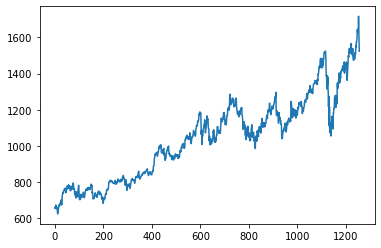

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [17]:
import numpy as np

In [18]:
df1

0        655.30
1        652.47
2        665.07
3        665.52
4        671.67
         ...   
1252    1655.08
1253    1717.39
1254    1629.51
1255    1581.21
1256    1523.60
Name: close, Length: 1257, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
print(df1)

[[0.02985988]
 [0.02727489]
 [0.03878405]
 ...
 [0.91972816]
 [0.87560971]
 [0.82298727]]


In [21]:
df1.mean().sum()

0.38279405402273253

In [22]:
df1.shape

(1257, 1)

In [23]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,test_size

(879, 378)

In [25]:
train_data

array([[0.02985988],
       [0.02727489],
       [0.03878405],
       [0.03919509],
       [0.04481266],
       [0.03499333],
       [0.04052869],
       [0.02794169],
       [0.0280239 ],
       [0.02950364],
       [0.01602148],
       [0.00149802],
       [0.        ],
       [0.01439559],
       [0.01771132],
       [0.03140357],
       [0.04482179],
       [0.04478525],
       [0.04328724],
       [0.04054696],
       [0.04441988],
       [0.04916056],
       [0.05531705],
       [0.052796  ],
       [0.06431429],
       [0.06641517],
       [0.07064433],
       [0.05242149],
       [0.0449314 ],
       [0.0534628 ],
       [0.08834652],
       [0.0991158 ],
       [0.10066863],
       [0.10441367],
       [0.11165714],
       [0.10484298],
       [0.11429694],
       [0.11528344],
       [0.12121157],
       [0.12610753],
       [0.12695701],
       [0.12071832],
       [0.12390617],
       [0.13029102],
       [0.12232595],
       [0.10729096],
       [0.11674492],
       [0.112

In [26]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)

(778, 100)
(778,)


(None, None)

In [29]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [30]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 3s 234ms/step - loss: 0.0334 - val_loss: 0.0568
Epoch 2/100
13/13 [==============================] - 2s 138ms/step - loss: 0.0048 - val_loss: 0.0062
Epoch 3/100
13/13 [==============================] - 2s 136ms/step - loss: 0.0021 - val_loss: 0.0092
Epoch 4/100
13/13 [==============================] - 2s 138ms/step - loss: 0.0013 - val_loss: 0.0091
Epoch 5/100
13/13 [==============================] - 2s 141ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 6/100
13/13 [==============================] - 2s 137ms/step - loss: 0.0010 - val_loss: 0.0058
Epoch 7/100
13/13 [==============================] - 2s 135ms/step - loss: 9.9950e-04 - val_loss: 0.0059
Epoch 8/100
13/13 [==============================] - 2s 138ms/step - loss: 9.8153e-04 - val_loss: 0.0058
Epoch 9/100
13/13 [==============================] - 2s 138ms/step - loss: 9.5806e-04 - val_loss: 0.0060
Epoch 10/100
13/13 [==============================] - 2s 158ms/step - loss: 9.5

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.3.0'

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

966.4061992586171

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1323.7449460063422

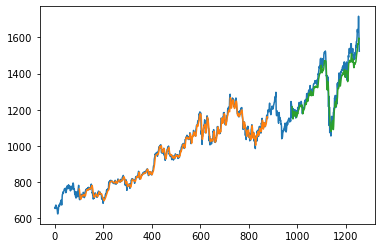

In [42]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

378

In [44]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape


(1, 100)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input

[0.5995633825974168,
 0.5832587369151793,
 0.5385100202780467,
 0.5807559509673176,
 0.5924112607099142,
 0.5973711613292166,
 0.592128098796105,
 0.5571713038235991,
 0.657273607482782,
 0.6614022908712253,
 0.6345658488463434,
 0.6396627632949085,
 0.6635214380971518,
 0.6602422404501361,
 0.6820274393028735,
 0.6957836277608284,
 0.7133670691828494,
 0.687416649920532,
 0.6628911744825442,
 0.6706826942399383,
 0.6854801878002884,
 0.6965509052046986,
 0.686704178008367,
 0.7184548493761304,
 0.716253493852646,
 0.7221816255320702,
 0.7296077750780977,
 0.7286121412521235,
 0.7267487531741536,
 0.7407058952483602,
 0.7419390197117227,
 0.7487349056431428,
 0.7459398235261877,
 0.7231498565921918,
 0.7466431611830685,
 0.7539688339209704,
 0.7576590730557736,
 0.769186503224392,
 0.7118233800398254,
 0.721889329362977,
 0.7290323169951952,
 0.7525347558413561,
 0.7580792487988454,
 0.7412539505654102,
 0.7325946765560204,
 0.756362008805422,
 0.7685288368439319,
 0.7399568863150586,


In [47]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8043265]
101
1 day input [0.58325874 0.53851002 0.58075595 0.59241126 0.59737116 0.5921281
 0.5571713  0.65727361 0.66140229 0.63456585 0.63966276 0.66352144
 0.66024224 0.68202744 0.69578363 0.71336707 0.68741665 0.66289117
 0.67068269 0.68548019 0.69655091 0.68670418 0.71845485 0.71625349
 0.72218163 0.72960778 0.72861214 0.72674875 0.7407059  0.74193902
 0.74873491 0.74593982 0.72314986 0.74664316 0.75396883 0.75765907
 0.7691865  0.71182338 0.72188933 0.72903232 0.75253476 0.75807925
 0.74125395 0.73259468 0.75636201 0.76852884 0.73995689 0.74762966
 0.67587095 0.70750288 0.7265752  0.74845174 0.77396372 0.80111073
 0.7922231  0.80471876 0.81847494 0.83706315 0.81260162 0.82048448
 0.81684905 0.81505873 0.81682164 0.85974351 0.85250918 0.86066607
 0.8167303  0.80892965 0.82831254 0.80476443 0.82290506 0.83647856
 0.79042365 0.78568297 0.77704196 0.7823307  0.80595188 0.79994154
 0.79852573 0.78365516 0.80804363 0.81663896 0.80565958 0.81626445
 0.8523813  0.84217834 0.87107912 0

10 day output [[0.6369109]]
11 day input [0.63966276 0.66352144 0.66024224 0.68202744 0.69578363 0.71336707
 0.68741665 0.66289117 0.67068269 0.68548019 0.69655091 0.68670418
 0.71845485 0.71625349 0.72218163 0.72960778 0.72861214 0.72674875
 0.7407059  0.74193902 0.74873491 0.74593982 0.72314986 0.74664316
 0.75396883 0.75765907 0.7691865  0.71182338 0.72188933 0.72903232
 0.75253476 0.75807925 0.74125395 0.73259468 0.75636201 0.76852884
 0.73995689 0.74762966 0.67587095 0.70750288 0.7265752  0.74845174
 0.77396372 0.80111073 0.7922231  0.80471876 0.81847494 0.83706315
 0.81260162 0.82048448 0.81684905 0.81505873 0.81682164 0.85974351
 0.85250918 0.86066607 0.8167303  0.80892965 0.82831254 0.80476443
 0.82290506 0.83647856 0.79042365 0.78568297 0.77704196 0.7823307
 0.80595188 0.79994154 0.79852573 0.78365516 0.80804363 0.81663896
 0.80565958 0.81626445 0.8523813  0.84217834 0.87107912 0.87045799
 0.87920861 0.89811652 0.93308245 0.91882387 0.92878935 0.91974643
 0.94308446 1.        

18 day output [[0.54737365]]
19 day input [0.67068269 0.68548019 0.69655091 0.68670418 0.71845485 0.71625349
 0.72218163 0.72960778 0.72861214 0.72674875 0.7407059  0.74193902
 0.74873491 0.74593982 0.72314986 0.74664316 0.75396883 0.75765907
 0.7691865  0.71182338 0.72188933 0.72903232 0.75253476 0.75807925
 0.74125395 0.73259468 0.75636201 0.76852884 0.73995689 0.74762966
 0.67587095 0.70750288 0.7265752  0.74845174 0.77396372 0.80111073
 0.7922231  0.80471876 0.81847494 0.83706315 0.81260162 0.82048448
 0.81684905 0.81505873 0.81682164 0.85974351 0.85250918 0.86066607
 0.8167303  0.80892965 0.82831254 0.80476443 0.82290506 0.83647856
 0.79042365 0.78568297 0.77704196 0.7823307  0.80595188 0.79994154
 0.79852573 0.78365516 0.80804363 0.81663896 0.80565958 0.81626445
 0.8523813  0.84217834 0.87107912 0.87045799 0.87920861 0.89811652
 0.93308245 0.91882387 0.92878935 0.91974643 0.94308446 1.
 0.91972816 0.87560971 0.82298727 0.80432647 0.76509291 0.73571694
 0.71335429 0.69618082 0.682

29 day output [[0.47536612]]
[[0.8043264746665955], [0.7650929093360901], [0.7357169389724731], [0.7133542895317078], [0.6961808204650879], [0.6828810572624207], [0.6722537279129028], [0.6631797552108765], [0.6547022461891174], [0.6460999250411987], [0.6369109153747559], [0.6269229650497437], [0.6161344647407532], [0.6047003865242004], [0.5928753018379211], [0.5809571146965027], [0.5692404508590698], [0.5579809546470642], [0.5473736524581909], [0.5375430583953857], [0.5285450220108032], [0.52037513256073], [0.5129820108413696], [0.5062832832336426], [0.5001798272132874], [0.49456948041915894], [0.4893561005592346], [0.4844578504562378], [0.4798097312450409], [0.47536611557006836]]


In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:
import matplotlib.pyplot as plt

In [50]:
len(df1)

1257

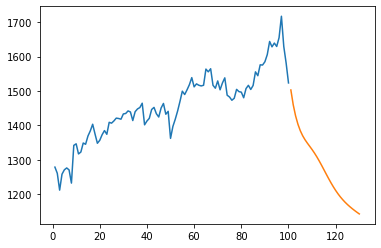

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

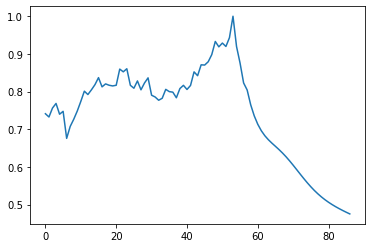

In [52]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [53]:
df3=scaler.inverse_transform(df3).tolist()

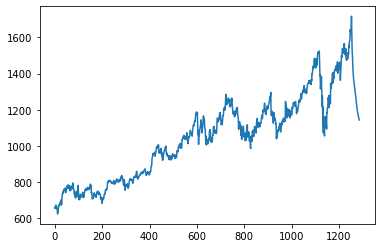

In [54]:
plt.plot(df3)